In [2]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Get data

In [3]:
X_train, y_train = np.load('X_train6000.npy'), np.load('y_train6000.npy')

In [6]:
X_train.shape, y_train.shape

((50000, 3072), (50000,))

In [9]:
from linear_classifier import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=5e4,
                      num_iters=15000, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 15000: loss 12459663.576402
iteration 100 / 15000: loss 24853362.955396
iteration 200 / 15000: loss 20898169.886403
iteration 300 / 15000: loss 23156787.202548
iteration 400 / 15000: loss 20140176.289336
iteration 500 / 15000: loss 19574662.931365
iteration 600 / 15000: loss 15038690.493562
iteration 700 / 15000: loss 17541854.289846
iteration 800 / 15000: loss 17662439.205282
iteration 900 / 15000: loss 14263623.841534
iteration 1000 / 15000: loss 16979377.999812
iteration 1100 / 15000: loss 12935393.967433
iteration 1200 / 15000: loss 12516386.783728
iteration 1300 / 15000: loss 14529592.110862
iteration 1400 / 15000: loss 14362424.014037
iteration 1500 / 15000: loss 16226880.202661
iteration 1600 / 15000: loss 12554256.674432
iteration 1700 / 15000: loss 12268864.472982
iteration 1800 / 15000: loss 12347018.984455
iteration 1900 / 15000: loss 12972093.587402
iteration 2000 / 15000: loss 12864603.958022
iteration 2100 / 15000: loss 9490916.332511
iteration 2200 / 15000:

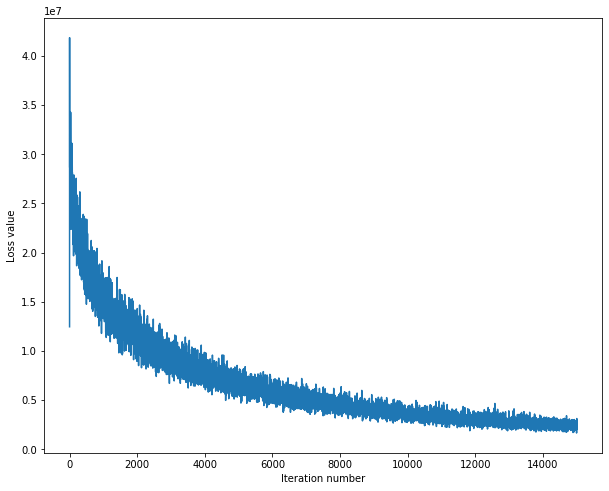

In [10]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [11]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))

training accuracy: 0.032900


In [12]:
import datautils

Using TensorFlow backend.


In [14]:
val_df = pd.read_csv('./data/val_merge.csv')
val_dir = './data/val_set'

In [16]:
X_val, y_val, label = datautils.gettestdata(val_df, val_dir, sample=len(val_df))

Found 11994 validated image filenames belonging to 251 classes.


In [17]:
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

validation accuracy: 0.010672


## Test

In [18]:
test_df = pd.read_csv('./data/sample_submission.csv')
test_df['label'] = test_df['label'].astype(str)
test_dir = './data/test_set'

In [24]:
test_df.head()

,img_name,label
0,test_024088.jpg,250
1,test_024089.jpg,250
2,test_024090.jpg,250
3,test_024091.jpg,250
4,test_024092.jpg,250


In [19]:
X_test, _, _ = datautils.gettestdata(test_df, test_dir, sample=len(test_df))

Found 28377 validated image filenames belonging to 1 classes.


In [21]:
pred_test = svm.predict(X_test)

In [22]:
n = len(pred_test)
pred_class = []
for i in range(n):
    pred_class.append(label[pred_test[i]])

In [23]:
pred_class

['strawberry_shortcake',
 'chiffon_cake',
 'taco',
 'sponge_cake',
 'chiffon_cake',
 'crab_food',
 'chiffon_cake',
 'chiffon_cake',
 'chicken_provencale',
 'chiffon_cake',
 'chiffon_cake',
 'sponge_cake',
 'chiffon_cake',
 'chiffon_cake',
 'chiffon_cake',
 'chiffon_cake',
 'chiffon_cake',
 'sponge_cake',
 'chiffon_cake',
 'bread_pudding',
 'ham_and_eggs',
 'chiffon_cake',
 'chiffon_cake',
 'chiffon_cake',
 'clam_food',
 'applesauce_cake',
 'chiffon_cake',
 'tostada',
 'chiffon_cake',
 'chiffon_cake',
 'caprese_salad',
 'shrimp_and_grits',
 'chiffon_cake',
 'chiffon_cake',
 'chiffon_cake',
 'crab_food',
 'crab_food',
 'crab_food',
 'crab_food',
 'chiffon_cake',
 'chicken_kiev',
 'fritter',
 'applesauce_cake',
 'tiramisu',
 'baked_alaska',
 'chiffon_cake',
 'chicken_provencale',
 'chiffon_cake',
 'chiffon_cake',
 'ham_and_eggs',
 'compote',
 'peach_melba',
 'crab_food',
 'chiffon_cake',
 'chiffon_cake',
 'chiffon_cake',
 'bread_pudding',
 'clam_chowder',
 'chiffon_cake',
 'pork_chop',
 '

In [25]:
test_df['class'] = pred_class

In [26]:
table = pd.read_table('./data/class_list.txt', header=None, sep=' ')
table.columns = ['label', 'class']

In [27]:
class_dir = {}
n = len(table)
for i in range(n):
    class_dir[table.iloc[i]['class']] = table.iloc[i]['label']

In [28]:
n = len(pred_test)
for i in range(n):
    test_df.loc[i, 'label'] = class_dir[test_df.iloc[i]['class']]

In [29]:
test_df

,img_name,label,class
0,test_024088.jpg,109,strawberry_shortcake
1,test_024089.jpg,219,chiffon_cake
2,test_024090.jpg,108,taco
3,test_024091.jpg,146,sponge_cake
4,test_024092.jpg,219,chiffon_cake
...,...,...,...
28372,test_024083.jpg,141,ceviche
28373,test_024084.jpg,117,crab_food
28374,test_024085.jpg,110,clam_chowder
28375,test_024086.jpg,219,chiffon_cake


In [30]:
test_df.to_csv('submissionSVM.csv')

## Calculate data

In [37]:
def calculate(df, name):
    dic = {}
    for i in range(251):
        length = len(df.loc[i]['img_name'].values)
        dic[f'class_{i}'] = length
        print(f'{name} clalss_{i} has {length} images')

In [38]:
calculate(train_df, 'train')

train clalss_0 has 633 images
train clalss_1 has 535 images
train clalss_2 has 442 images
train clalss_3 has 567 images
train clalss_4 has 453 images
train clalss_5 has 419 images
train clalss_6 has 461 images
train clalss_7 has 396 images
train clalss_8 has 591 images
train clalss_9 has 455 images
train clalss_10 has 340 images
train clalss_11 has 576 images
train clalss_12 has 606 images
train clalss_13 has 425 images
train clalss_14 has 450 images
train clalss_15 has 326 images
train clalss_16 has 511 images
train clalss_17 has 456 images
train clalss_18 has 406 images
train clalss_19 has 538 images
train clalss_20 has 507 images
train clalss_21 has 451 images
train clalss_22 has 415 images
train clalss_23 has 512 images
train clalss_24 has 355 images
train clalss_25 has 397 images
train clalss_26 has 468 images
train clalss_27 has 482 images
train clalss_28 has 499 images
train clalss_29 has 549 images
train clalss_30 has 488 images
train clalss_31 has 398 images
train clalss_32 ha

In [39]:
calculate(val_df, 'val')

val clalss_0 has 55 images
val clalss_1 has 61 images
val clalss_2 has 53 images
val clalss_3 has 51 images
val clalss_4 has 41 images
val clalss_5 has 52 images
val clalss_6 has 57 images
val clalss_7 has 54 images
val clalss_8 has 49 images
val clalss_9 has 46 images
val clalss_10 has 48 images
val clalss_11 has 47 images
val clalss_12 has 45 images
val clalss_13 has 61 images
val clalss_14 has 46 images
val clalss_15 has 57 images
val clalss_16 has 49 images
val clalss_17 has 57 images
val clalss_18 has 31 images
val clalss_19 has 49 images
val clalss_20 has 42 images
val clalss_21 has 53 images
val clalss_22 has 42 images
val clalss_23 has 56 images
val clalss_24 has 54 images
val clalss_25 has 58 images
val clalss_26 has 57 images
val clalss_27 has 54 images
val clalss_28 has 54 images
val clalss_29 has 41 images
val clalss_30 has 52 images
val clalss_31 has 56 images
val clalss_32 has 49 images
val clalss_33 has 41 images
val clalss_34 has 67 images
val clalss_35 has 62 images
va

## Load data

In [54]:
train_dir = pathlib.Path('D:/Rice/COMP 540/data/train')
val_dir = pathlib.Path('D:/Rice/COMP 540/data/val')
train_count = len(list(train_dir.glob('*/*.jpg')))
val_count = len(list(val_dir.glob('*/*.jpg')))
train_count, val_count

(118230, 11994)

In [59]:
CLASS_NAMES = np.array([item.name.split('_')[1] for item in train_dir.glob('*')])
CLASS_NAMES

array(['0', '1', '10', '100', '101', '102', '103', '104', '105', '106',
       '107', '108', '109', '11', '110', '111', '112', '113', '114',
       '115', '116', '117', '118', '119', '12', '120', '121', '122',
       '123', '124', '125', '126', '127', '128', '129', '13', '130',
       '131', '132', '133', '134', '135', '136', '137', '138', '139',
       '14', '140', '141', '142', '143', '144', '145', '146', '147',
       '148', '149', '15', '150', '151', '152', '153', '154', '155',
       '156', '157', '158', '159', '16', '160', '161', '162', '163',
       '164', '165', '166', '167', '168', '169', '17', '170', '171',
       '172', '173', '174', '175', '176', '177', '178', '179', '18',
       '180', '181', '182', '183', '184', '185', '186', '187', '188',
       '189', '19', '190', '191', '192', '193', '194', '195', '196',
       '197', '198', '199', '2', '20', '200', '201', '202', '203', '204',
       '205', '206', '207', '208', '209', '21', '210', '211', '212',
       '213', '214', '21

In [63]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [64]:
BATCH_SIZE = 32
SIZE = (256, 256)

In [65]:
train_datagen.flow_from_directory(directory=str(train_dir),
                                 batch_size=BATCH_SIZE,
                                 shuffle=True,
                                 target_size=SIZE,
                                 classes=list(CLASS_NAMES))

Found 0 images belonging to 251 classes.


## Sample

In [161]:
train_df = pd.read_csv('D:\Rice\COMP 540\data/train_labels.csv')
val_df = pd.read_csv('D:\Rice\COMP 540\data/val_labels.csv')

In [182]:
# network parameters
sample_train      = 50000
sample_val  = 10000
image_size  = 256
input_shape = (image_size, image_size, 3)
batch_size  = 36
epochs      = 50

kernel_size = 3
filters     = 16
latent_dim  = 128

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
                rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [183]:
df_train = train_df.sample(sample_train) 
df_val  = val_df.sample(sample_val)
df_train['label'] = df_train['label'].astype(str)
df_val['label'] = df_val['label'].astype(str)
df_train.shape, df_val.shape

((50000, 2), (10000, 2))

In [184]:
df_train.head()

,img_name,label
8995,train_110894.jpg,230
59753,train_042090.jpg,124
103763,train_086842.jpg,27
87739,train_070508.jpg,75
49354,train_031524.jpg,33


In [185]:
train_dir = 'D:/Rice/COMP 540/data/train_set'
val_dir = 'D:/Rice/COMP 540/data/val_set'

In [186]:
train_generator = train_datagen.flow_from_dataframe(
                df_train,
                x_col='img_name',
                y_col='label',    
                class_mode='categorical',
                directory=train_dir,  # this is the target directory
                shuffle = True,
                target_size=(256, 256),  # all images will be resized to 150x150
                batch_size=batch_size)  # since we use binary_crossentropy loss, we need binary labels

test_generator = test_datagen.flow_from_dataframe(
                df_val,
                x_col='img_name',
                y_col='label',    
                class_mode='categorical',
                directory= val_dir,  # this is the target directory
                shuffle = False,
                target_size=(256, 256),  # all images will be resized to 150x150
                batch_size=batch_size)  # since we use binary_crossentropy loss, we need binary labels

Found 50000 validated image filenames belonging to 251 classes.
Found 10000 validated image filenames belonging to 251 classes.


In [90]:
train_generator.n

20000

## ResNet-18

In [171]:
from keras.layers import Input
from keras.layers import Conv2D, MaxPool2D, Dense, BatchNormalization, Activation, add, GlobalAvgPool2D
from keras.models import Model
from keras import regularizers
from keras.utils import plot_model
from keras import backend as K

In [172]:
def conv2d_bn(x, nb_filter, kernel_size, strides=(1, 1), padding='same'):
    """
    conv2d -> batch normalization -> relu activation
    """
    x = Conv2D(nb_filter, kernel_size=kernel_size,
                          strides=strides,
                          padding=padding,
                          kernel_regularizer=regularizers.l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

In [173]:
def shortcut(input, residual):
    input_shape = K.int_shape(input)
    residual_shape = K.int_shape(residual)
    stride_height = int(round(input_shape[1] / residual_shape[1]))
    stride_width = int(round(input_shape[2] / residual_shape[2]))
    equal_channels = input_shape[3] == residual_shape[3]
 
    identity = input
    if stride_width > 1 or stride_height > 1 or not equal_channels:
        identity = Conv2D(filters=residual_shape[3],
                           kernel_size=(1, 1),
                           strides=(stride_width, stride_height),
                           padding="valid",
                           kernel_regularizer=regularizers.l2(0.0001))(input)
 
    return add([identity, residual])

In [174]:
def basic_block(nb_filter, strides=(1, 1)):
    def f(input):
 
        conv1 = conv2d_bn(input, nb_filter, kernel_size=(3, 3), strides=strides)
        residual = conv2d_bn(conv1, nb_filter, kernel_size=(3, 3))
 
        return shortcut(input, residual)
 
    return f

In [175]:
def residual_block(nb_filter, repetitions, is_first_layer=False):
    """
    构建每层的residual模块，对应论文参数统计表中的conv2_x -> conv5_x
    """
    def f(input):
        for i in range(repetitions):
            strides = (1, 1)
            if i == 0 and not is_first_layer:
                strides = (2, 2)
            input = basic_block(nb_filter, strides)(input)
        return input
    return f

In [176]:
SHAPE = (256, 256, 3)
num_classes = 251
input_ = Input(shape=SHAPE)
conv1 = conv2d_bn(input_, 64, kernel_size=(7, 7), strides=(2, 2))
pool1 = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(conv1)

conv2 = residual_block(64, 2, is_first_layer=True)(pool1)
conv3 = residual_block(128, 2, is_first_layer=True)(conv2)
conv4 = residual_block(256, 2, is_first_layer=True)(conv3)
conv5 = residual_block(512, 2, is_first_layer=True)(conv4)

pool2 = GlobalAvgPool2D()(conv5)
output_ = Dense(num_classes, activation='softmax')(pool2)

model = Model(inputs=input_, outputs=output_)
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 128, 128, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 64) 256         conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation_9 (Activation)       (None, 128, 128, 64) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_pooli

In [178]:
#plot_model(model, 'ResNet18.png')

In [179]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=test_generator.n//test_generator.batch_size

In [180]:
model.compile(optimizer='adam', loss="categorical_crossentropy",metrics=["accuracy"])

In [181]:
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
                   )

Epoch 1/10
   7/2777 [..............................] - ETA: 293:08:25 - loss: 7.3617 - acc: 0.0000e+00

KeyboardInterrupt: 

## CNN Model

In [117]:
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.models import Sequential, load_model

In [118]:
num_classes = 251

In [119]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
activation_6 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)        0         
__________

In [120]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=test_generator.n//test_generator.batch_size
# STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [121]:
model.compile(optimizer='adam', loss="categorical_crossentropy",metrics=["accuracy"])

In [122]:
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
                   )

Epoch 1/10
  2/166 [..............................] - ETA: 5:45:25 - loss: 10.7250 - acc: 0.0000e+00

C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (34.604201). Check your callbacks.
  % delta_t_median)


166/166 [==============================] - 1671s 10s/step - loss: 6.3205 - acc: 0.0035 - val_loss: 5.5264 - val_acc: 0.0049
Epoch 2/10
166/166 [==============================] - 608s 4s/step - loss: 5.5141 - acc: 0.0057 - val_loss: 5.5324 - val_acc: 0.0047
Epoch 3/10
166/166 [==============================] - 671s 4s/step - loss: 5.5055 - acc: 0.0059 - val_loss: 5.5370 - val_acc: 0.0045
Epoch 4/10
166/166 [==============================] - 603s 4s/step - loss: 5.4996 - acc: 0.0058 - val_loss: 5.5432 - val_acc: 0.0034
Epoch 5/10
166/166 [==============================] - 633s 4s/step - loss: 5.4876 - acc: 0.0084 - val_loss: 5.5502 - val_acc: 0.0044
Epoch 6/10
166/166 [==============================] - 605s 4s/step - loss: 5.4675 - acc: 0.0126 - val_loss: 5.5460 - val_acc: 0.0047
Epoch 7/10
166/166 [==============================] - 605s 4s/step - loss: 5.4295 - acc: 0.0147 - val_loss: 5.5603 - val_acc: 0.0079
Epoch 8/10
166/166 [==============================] - 604s 4s/step - loss: 5.3

In [187]:
model.save('resmodel.hdf5')
model.save('resmodel.h5')

In [188]:
train_generator.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '100': 3,
 '101': 4,
 '102': 5,
 '103': 6,
 '104': 7,
 '105': 8,
 '106': 9,
 '107': 10,
 '108': 11,
 '109': 12,
 '11': 13,
 '110': 14,
 '111': 15,
 '112': 16,
 '113': 17,
 '114': 18,
 '115': 19,
 '116': 20,
 '117': 21,
 '118': 22,
 '119': 23,
 '12': 24,
 '120': 25,
 '121': 26,
 '122': 27,
 '123': 28,
 '124': 29,
 '125': 30,
 '126': 31,
 '127': 32,
 '128': 33,
 '129': 34,
 '13': 35,
 '130': 36,
 '131': 37,
 '132': 38,
 '133': 39,
 '134': 40,
 '135': 41,
 '136': 42,
 '137': 43,
 '138': 44,
 '139': 45,
 '14': 46,
 '140': 47,
 '141': 48,
 '142': 49,
 '143': 50,
 '144': 51,
 '145': 52,
 '146': 53,
 '147': 54,
 '148': 55,
 '149': 56,
 '15': 57,
 '150': 58,
 '151': 59,
 '152': 60,
 '153': 61,
 '154': 62,
 '155': 63,
 '156': 64,
 '157': 65,
 '158': 66,
 '159': 67,
 '16': 68,
 '160': 69,
 '161': 70,
 '162': 71,
 '163': 72,
 '164': 73,
 '165': 74,
 '166': 75,
 '167': 76,
 '168': 77,
 '169': 78,
 '17': 79,
 '170': 80,
 '171': 81,
 '172': 82,
 '173': 83,
 '174': 84,
 '

In [189]:
labels = (train_generator.class_indices)

In [190]:
labels

{'0': 0,
 '1': 1,
 '10': 2,
 '100': 3,
 '101': 4,
 '102': 5,
 '103': 6,
 '104': 7,
 '105': 8,
 '106': 9,
 '107': 10,
 '108': 11,
 '109': 12,
 '11': 13,
 '110': 14,
 '111': 15,
 '112': 16,
 '113': 17,
 '114': 18,
 '115': 19,
 '116': 20,
 '117': 21,
 '118': 22,
 '119': 23,
 '12': 24,
 '120': 25,
 '121': 26,
 '122': 27,
 '123': 28,
 '124': 29,
 '125': 30,
 '126': 31,
 '127': 32,
 '128': 33,
 '129': 34,
 '13': 35,
 '130': 36,
 '131': 37,
 '132': 38,
 '133': 39,
 '134': 40,
 '135': 41,
 '136': 42,
 '137': 43,
 '138': 44,
 '139': 45,
 '14': 46,
 '140': 47,
 '141': 48,
 '142': 49,
 '143': 50,
 '144': 51,
 '145': 52,
 '146': 53,
 '147': 54,
 '148': 55,
 '149': 56,
 '15': 57,
 '150': 58,
 '151': 59,
 '152': 60,
 '153': 61,
 '154': 62,
 '155': 63,
 '156': 64,
 '157': 65,
 '158': 66,
 '159': 67,
 '16': 68,
 '160': 69,
 '161': 70,
 '162': 71,
 '163': 72,
 '164': 73,
 '165': 74,
 '166': 75,
 '167': 76,
 '168': 77,
 '169': 78,
 '17': 79,
 '170': 80,
 '171': 81,
 '172': 82,
 '173': 83,
 '174': 84,
 '

In [191]:
label = dict((v,k) for k,v in labels.items())

In [192]:
label

{0: '0',
 1: '1',
 2: '10',
 3: '100',
 4: '101',
 5: '102',
 6: '103',
 7: '104',
 8: '105',
 9: '106',
 10: '107',
 11: '108',
 12: '109',
 13: '11',
 14: '110',
 15: '111',
 16: '112',
 17: '113',
 18: '114',
 19: '115',
 20: '116',
 21: '117',
 22: '118',
 23: '119',
 24: '12',
 25: '120',
 26: '121',
 27: '122',
 28: '123',
 29: '124',
 30: '125',
 31: '126',
 32: '127',
 33: '128',
 34: '129',
 35: '13',
 36: '130',
 37: '131',
 38: '132',
 39: '133',
 40: '134',
 41: '135',
 42: '136',
 43: '137',
 44: '138',
 45: '139',
 46: '14',
 47: '140',
 48: '141',
 49: '142',
 50: '143',
 51: '144',
 52: '145',
 53: '146',
 54: '147',
 55: '148',
 56: '149',
 57: '15',
 58: '150',
 59: '151',
 60: '152',
 61: '153',
 62: '154',
 63: '155',
 64: '156',
 65: '157',
 66: '158',
 67: '159',
 68: '16',
 69: '160',
 70: '161',
 71: '162',
 72: '163',
 73: '164',
 74: '165',
 75: '166',
 76: '167',
 77: '168',
 78: '169',
 79: '17',
 80: '170',
 81: '171',
 82: '172',
 83: '173',
 84: '174',
 8

In [124]:
model.evaluate_generator(generator=test_generator, steps=STEP_SIZE_VALID)

[5.589702300142714, 0.011066398506523138]

In [125]:
from keras.preprocessing.image import load_img, img_to_array

In [136]:
test_dir = 'D:/Rice/COMP 540/data/test_set'
test_df = pd.read_csv('D:\Rice\COMP 540\data\sample_submission.csv')

In [137]:
test_df.head()

,img_name,label
0,test_024088.jpg,250
1,test_024089.jpg,250
2,test_024090.jpg,250
3,test_024091.jpg,250
4,test_024092.jpg,250


In [138]:
img = os.path.join(test_dir, test_df.iloc[0]['img_name'])

In [139]:
img = load_img(img, target_size=(256, 256, 3))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.

In [142]:
pred = model.predict(img)

In [147]:
index = np.argmax(pred)

In [146]:
import matplotlib.pyplot as plt

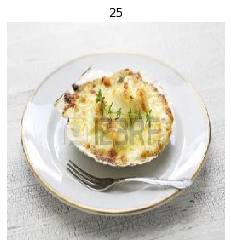

In [149]:
plt.imshow(img[0])
plt.axis('off')
plt.title(index)
plt.show()

In [ ]:
hist = model.fit(x_train, y_train, epochs=100, shuffle=True)


# evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print(loss, accuracy)

## Evaluate model

In [152]:
val_df = pd.read_csv('D:\Rice\COMP 540\data/val_labels.csv')

In [193]:
model = load_model('cnnmodel.h5')

In [197]:
labels = (train_generator.class_indices)
label = dict((v,k) for k,v in labels.items())

In [220]:
val_df[val_df['img_name'] == 'val_004198.jpg']['label']

5951    126
Name: label, dtype: int64

In [217]:
test_generator.reset()

In [218]:
test_generator.classes

[31,
 136,
 14,
 188,
 248,
 72,
 37,
 153,
 181,
 45,
 200,
 1,
 233,
 157,
 145,
 170,
 6,
 60,
 35,
 101,
 35,
 175,
 41,
 245,
 22,
 6,
 61,
 18,
 35,
 164,
 136,
 129,
 23,
 163,
 214,
 147,
 225,
 137,
 83,
 130,
 141,
 99,
 73,
 101,
 85,
 19,
 97,
 183,
 202,
 132,
 29,
 200,
 17,
 112,
 186,
 219,
 102,
 37,
 15,
 147,
 142,
 116,
 181,
 92,
 126,
 35,
 7,
 229,
 50,
 36,
 24,
 82,
 236,
 21,
 86,
 12,
 11,
 162,
 226,
 21,
 75,
 86,
 233,
 11,
 56,
 76,
 82,
 59,
 107,
 164,
 91,
 115,
 179,
 175,
 167,
 89,
 248,
 87,
 134,
 126,
 124,
 49,
 92,
 229,
 86,
 71,
 206,
 223,
 144,
 9,
 209,
 92,
 43,
 8,
 222,
 22,
 16,
 52,
 204,
 82,
 114,
 215,
 193,
 84,
 105,
 247,
 147,
 215,
 113,
 113,
 123,
 66,
 159,
 237,
 153,
 178,
 215,
 31,
 113,
 53,
 23,
 217,
 137,
 18,
 104,
 121,
 165,
 229,
 76,
 240,
 237,
 97,
 180,
 159,
 41,
 164,
 72,
 239,
 27,
 52,
 6,
 174,
 211,
 180,
 181,
 101,
 26,
 244,
 195,
 248,
 216,
 45,
 98,
 26,
 246,
 175,
 110,
 170,
 101,
 82,
 133,


In [219]:
test_generator.filenames

['val_004198.jpg',
 'val_011438.jpg',
 'val_001236.jpg',
 'val_006973.jpg',
 'val_009517.jpg',
 'val_003455.jpg',
 'val_001127.jpg',
 'val_011993.jpg',
 'val_002425.jpg',
 'val_003839.jpg',
 'val_006317.jpg',
 'val_006901.jpg',
 'val_004128.jpg',
 'val_006406.jpg',
 'val_011375.jpg',
 'val_001239.jpg',
 'val_006754.jpg',
 'val_005514.jpg',
 'val_004057.jpg',
 'val_009716.jpg',
 'val_003389.jpg',
 'val_003898.jpg',
 'val_001045.jpg',
 'val_008613.jpg',
 'val_007460.jpg',
 'val_005310.jpg',
 'val_002161.jpg',
 'val_002523.jpg',
 'val_003948.jpg',
 'val_010375.jpg',
 'val_010828.jpg',
 'val_011645.jpg',
 'val_005558.jpg',
 'val_011288.jpg',
 'val_003321.jpg',
 'val_011297.jpg',
 'val_005078.jpg',
 'val_011266.jpg',
 'val_007924.jpg',
 'val_011332.jpg',
 'val_011149.jpg',
 'val_003030.jpg',
 'val_001247.jpg',
 'val_000925.jpg',
 'val_003360.jpg',
 'val_006925.jpg',
 'val_009083.jpg',
 'val_007307.jpg',
 'val_001276.jpg',
 'val_011066.jpg',
 'val_008285.jpg',
 'val_002548.jpg',
 'val_003324

In [202]:
n = len(val_df)
pred = model.predict_generator(test_generator, steps=STEP_SIZE_VALID)
index = np.argmax(pred)
predictions = [label[i] for i in pred]

filenames = test_generator.filenames
n = len(filenames)
for i in range(n):
    print('predict  %d' % (int(predictions[idx])))
    print('title    %s' % filenames[idx])
    print('')
    print(f'for image {filenames[i]}, true label is {true_label}, predict label is {pred_label}, which is {pred_label == true_label}')
val_acc = np.mean(pred_labels == true_labels)

KeyboardInterrupt: 

In [160]:
print(val_acc)

0.0


In [222]:
table = pd.read_table('./data/class_list.txt', header=None, sep=' ')

In [223]:
table[]

,0,1
0,0,macaron
1,1,beignet
2,2,cruller
3,3,cockle_food
4,4,samosa
...,...,...
246,246,chicken_cordon_bleu
247,247,eccles_cake
248,248,moo_goo_gai_pan
249,249,buffalo_wing
